<a href="https://colab.research.google.com/github/vitoraugusto1993/ml-projects/blob/main/XGBoost/Regression/University%20Admission/XGBoost_University_Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost to Solve Regression Machine Learning Problems

## TASK 1: Understand the problem statement and business case

*   In this project, we will learn how to build and train regression models using Scikit-learn library.
*   Scikit-learn is a free machine learning library developed for python.
*   Scikit-learn offers several algorithms for classification, regression, ans clustering.
*   In this project, we will learn how to train XGBoost algorithm. XGBoost is the go-to algorithm for most developers and has won several Kaggle competitions.
*   Why does XGBoost work well?
  * Since the technique is an ensemble algorithm, it is very robust and could work well with several data types and complex distributions.
  * XGBoost has a many tunable hyperparameters that could improve model fitting.

## TASK 2: Import key libraries and datasets

In [ ]:
pip install wget

In [6]:
pip install xgboost

In [ ]:
pip install plotly

In [ ]:
import wget

URL = "https://files.pythonhosted.org/packages/8a/08/9dee6dfd7f2aad6c30282d55c8f495b4dc1e4747b4e2bdbeb80572ddf312/jupyterthemes-0.20.0-py2.py3-none-any.whl"
wget.download(URL, "jupyterthemes-0.20.0-py2.py3-none-any.whl")

In [ ]:
pip install jupyterthemes-0.20.0-py2.py3-none-any.whl

In [4]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
%matplotlib inline

In [10]:
# read the csv file
df = pd.read_csv('university_admission.csv')

In [11]:
# Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GRE_Score            1000 non-null   int64  
 1   TOEFL_Score          1000 non-null   int64  
 2   University_Rating    1000 non-null   int64  
 3   SOP                  1000 non-null   float64
 4   LOR                  1000 non-null   float64
 5   CGPA                 1000 non-null   float64
 6   Research             1000 non-null   int64  
 7   Chance_of_Admission  1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [12]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


## TASK 3: Perform Data Visualization

In [13]:
# check if there are any Null values
df.isnull().sum()

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

<Axes: >

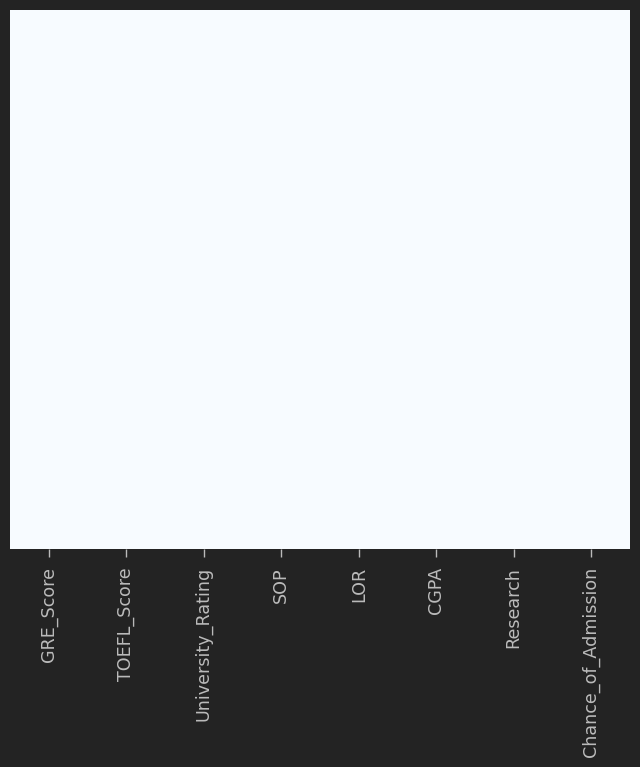

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='Blues', cbar=False)

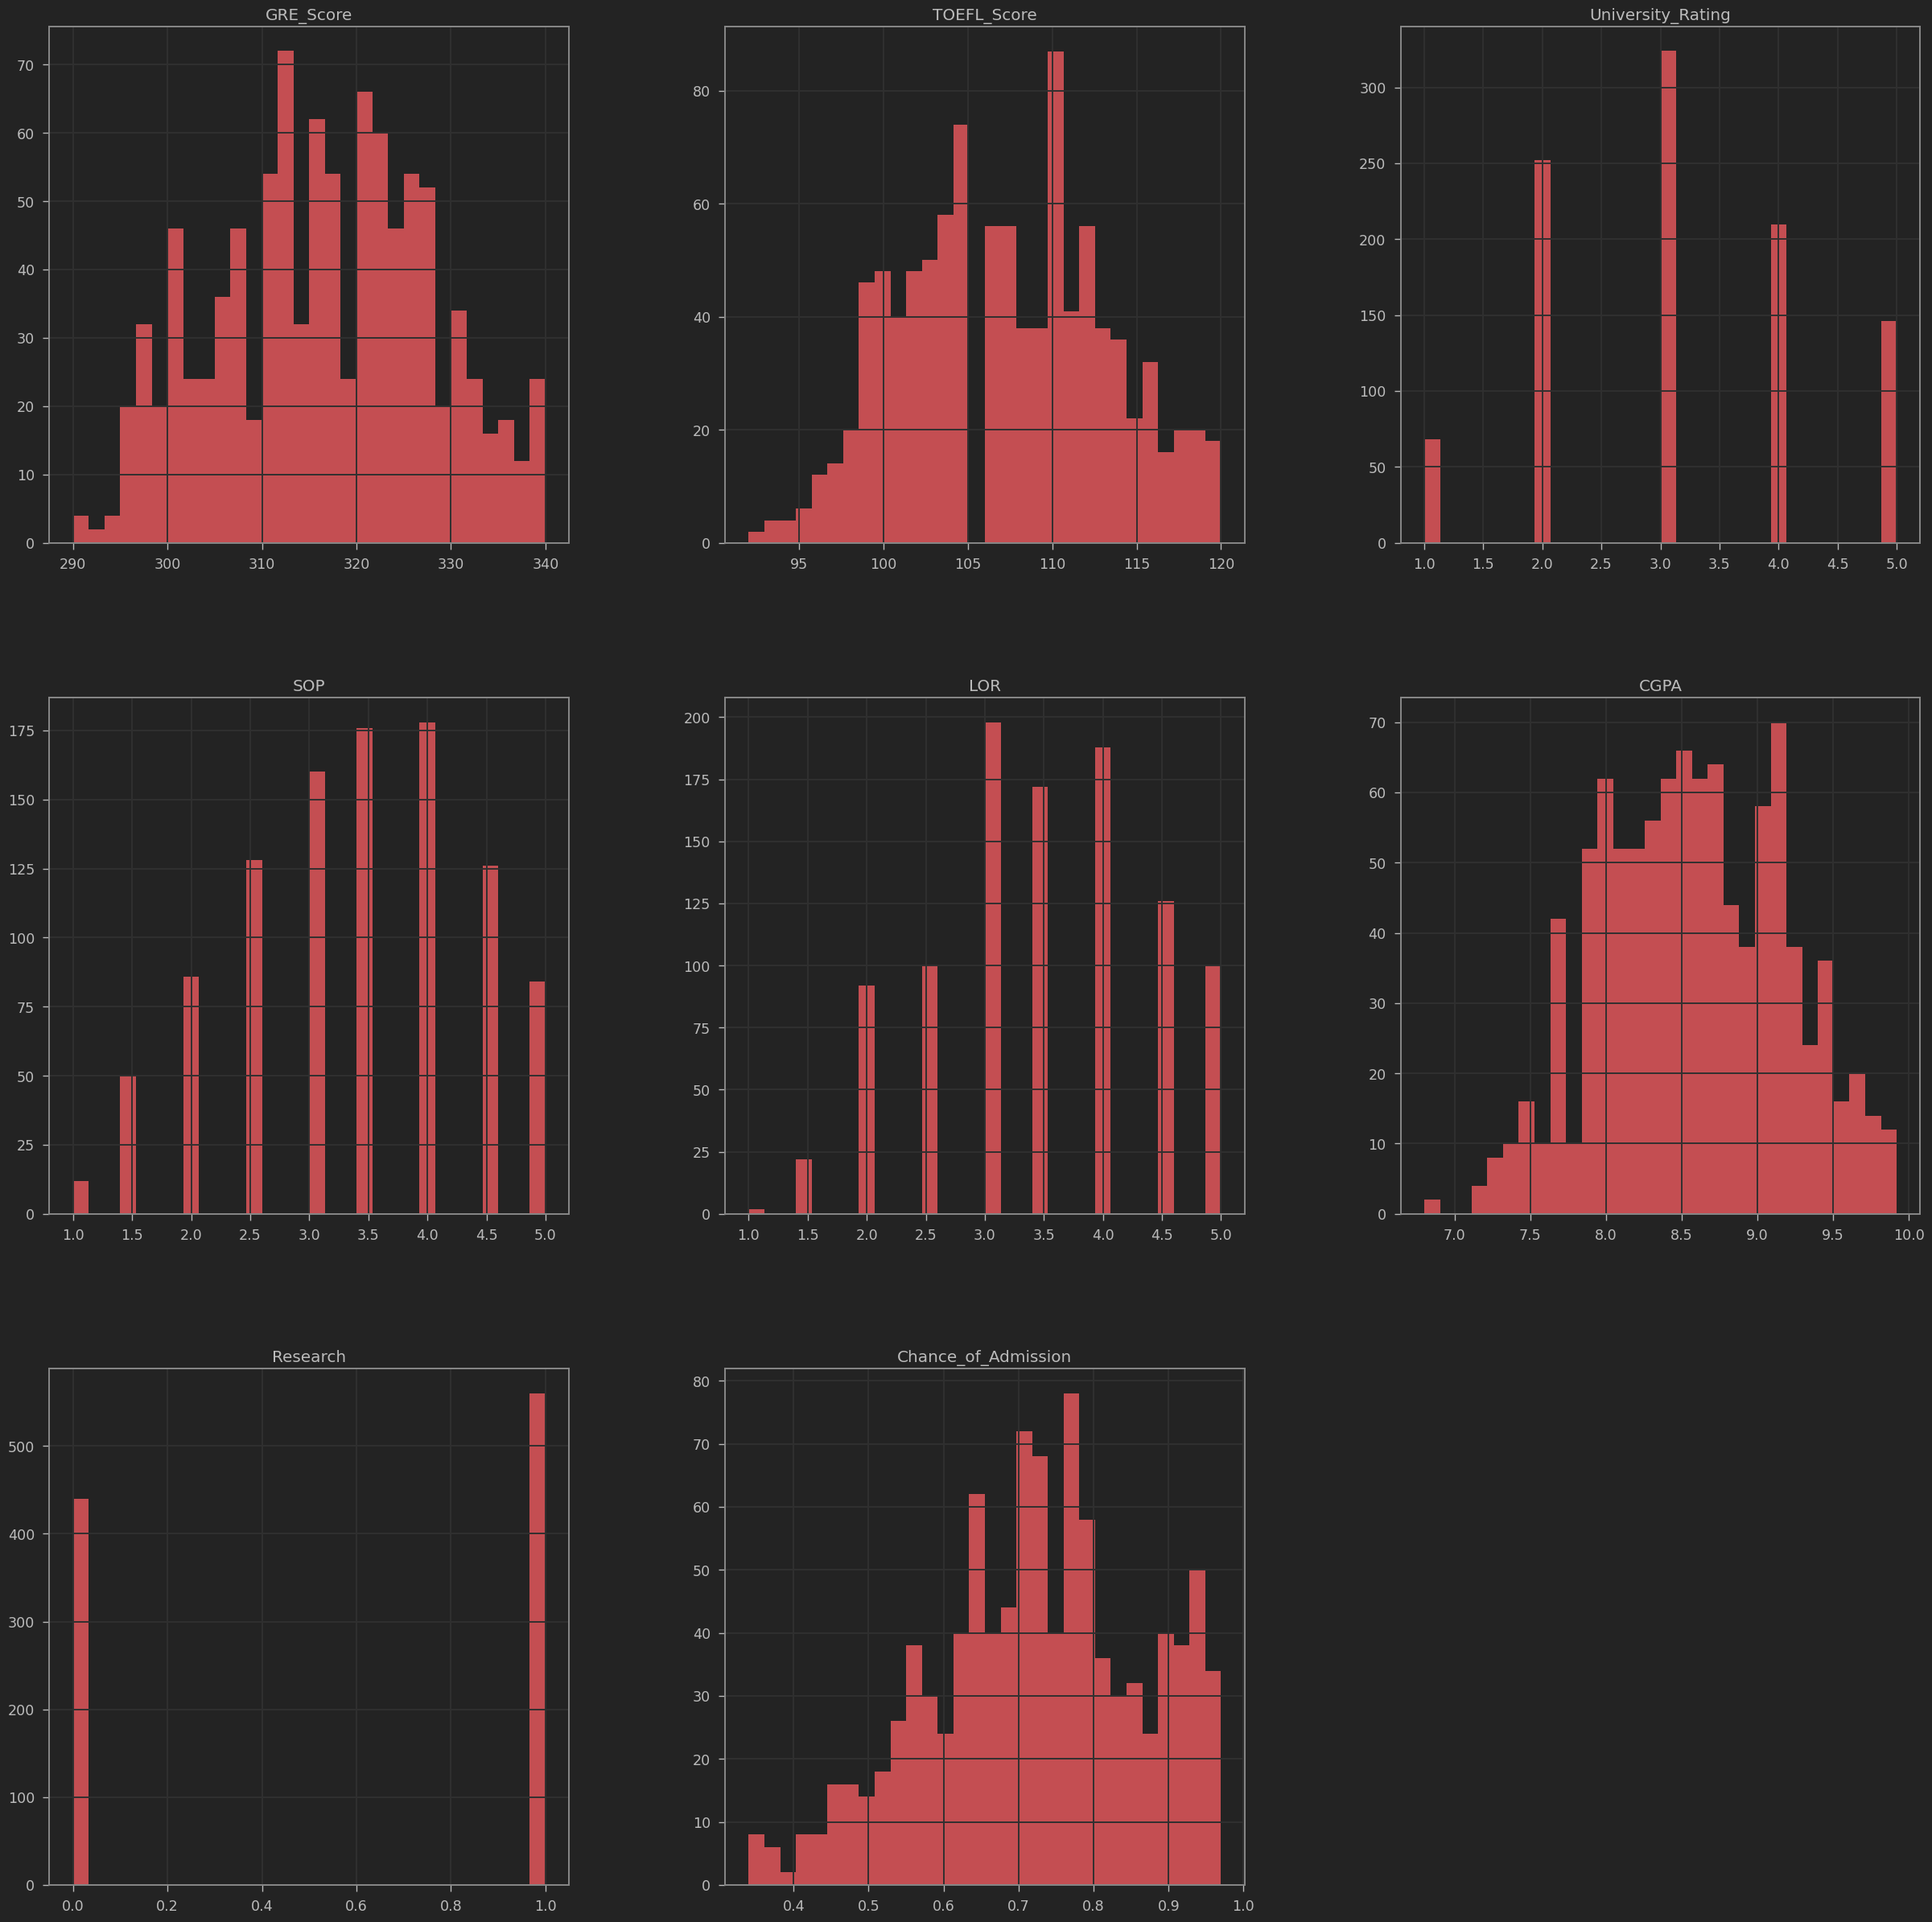

In [16]:
# Plot the histogram
df.hist(bins=30, figsize=(30,30), color='r');

In [17]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [18]:
column_name = 'GRE_Score'
print("Min {} value: {}".format(column_name, df[column_name].min()))
print("Max {} value: {}".format(column_name, df[column_name].max()))
print("Mean {} value: {}".format(column_name, df[column_name].mean()))
print("Standard deviation {} value: {}".format(column_name, df[column_name].std()))
print("Variance {} value: {}".format(column_name, df[column_name].var()))

Min GRE_Score value: 290
Max GRE_Score value: 340
Mean GRE_Score value: 316.472
Standard deviation GRE_Score value: 11.289493729511022
Variance GRE_Score value: 127.45266866866868


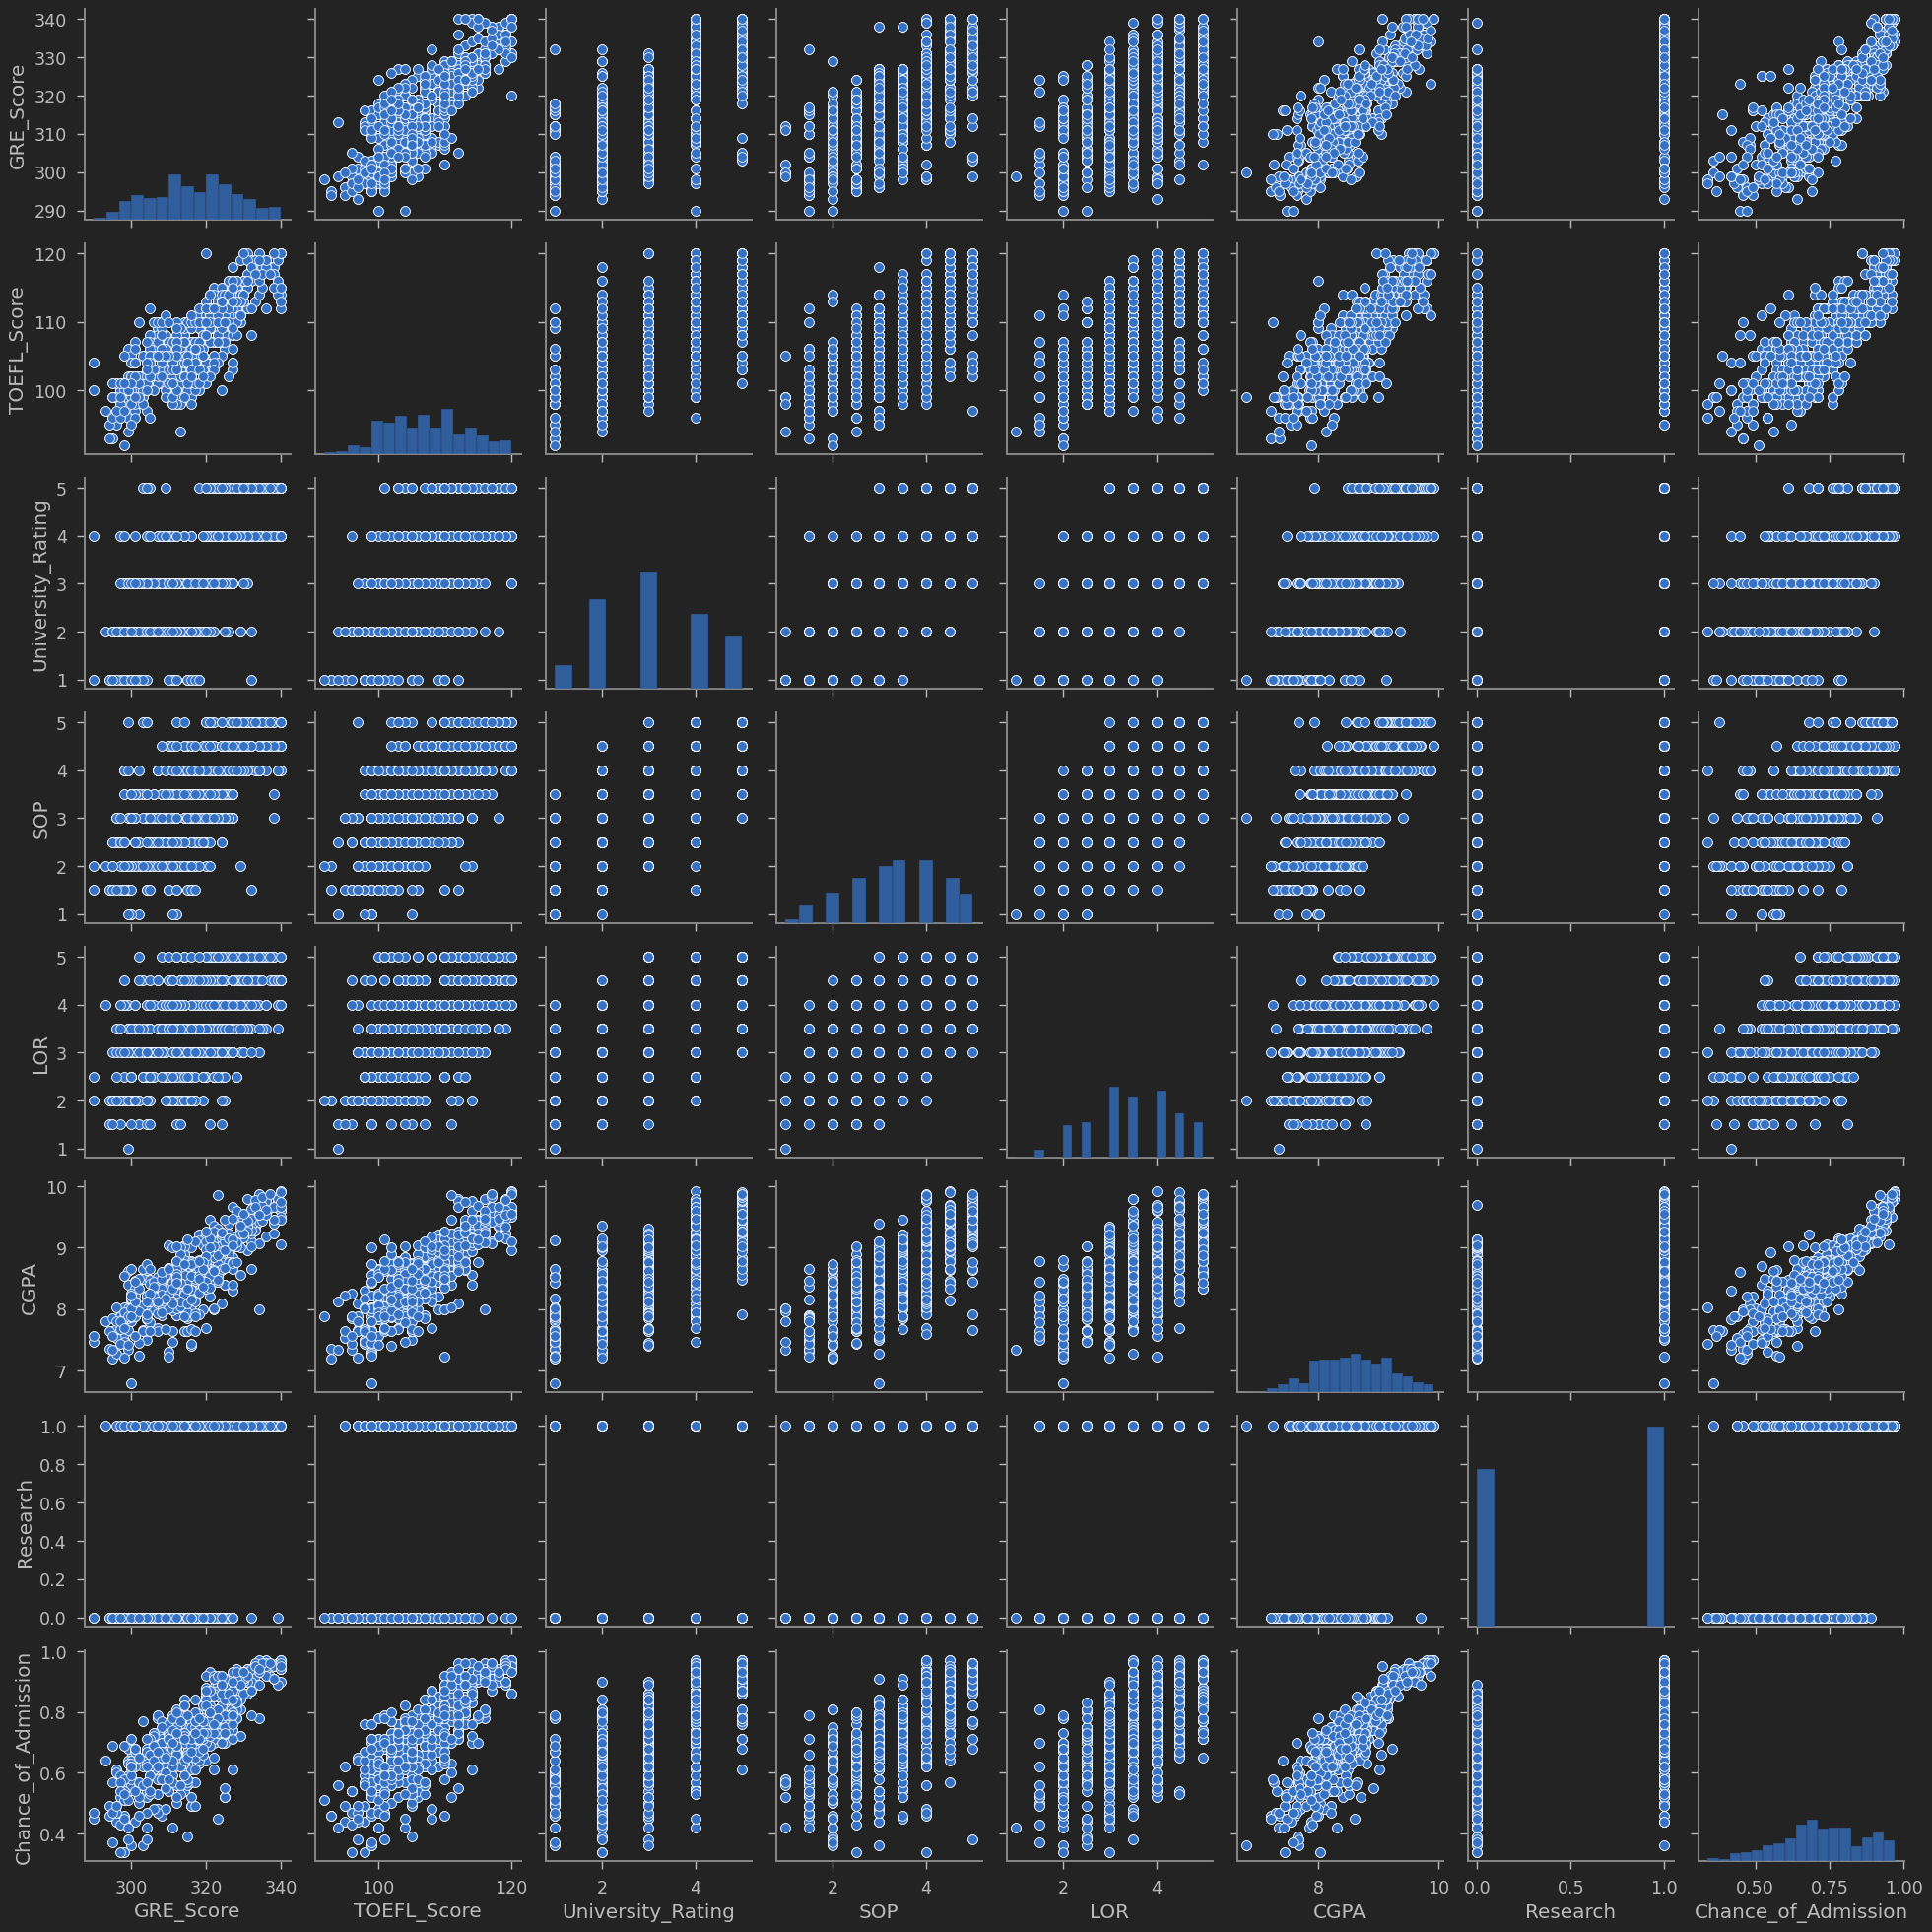

In [71]:
sns.pairplot(df)
plt.show()

<Axes: >

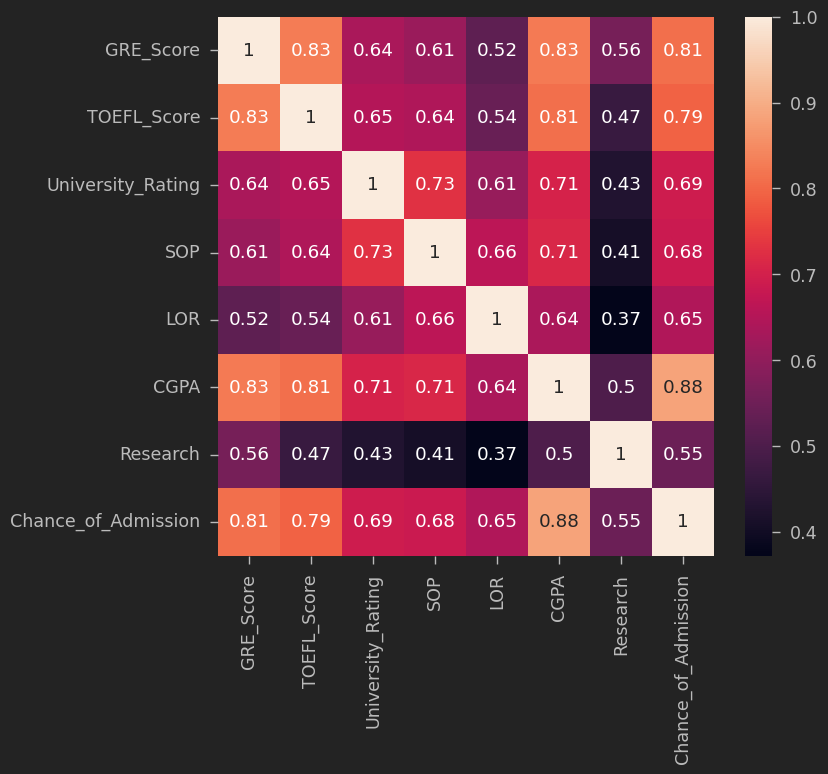

In [22]:
# Plot the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

## TASK 4: Perform Feature Engineering

In [23]:
# Create train and test data
X = df.drop(["Chance_of_Admission"], axis=1)
Y = df["Chance_of_Admission"]

In [24]:
# Convert the data type to float32
X = np.array(X).astype(np.float32)
Y = np.array(Y).astype(np.float32)

In [25]:
# spliting the data into training, testing and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

In [26]:
X_train.shape

(800, 7)

In [27]:
X_test.shape

(200, 7)

## TASK 5: Understand XGBoost Algorithm

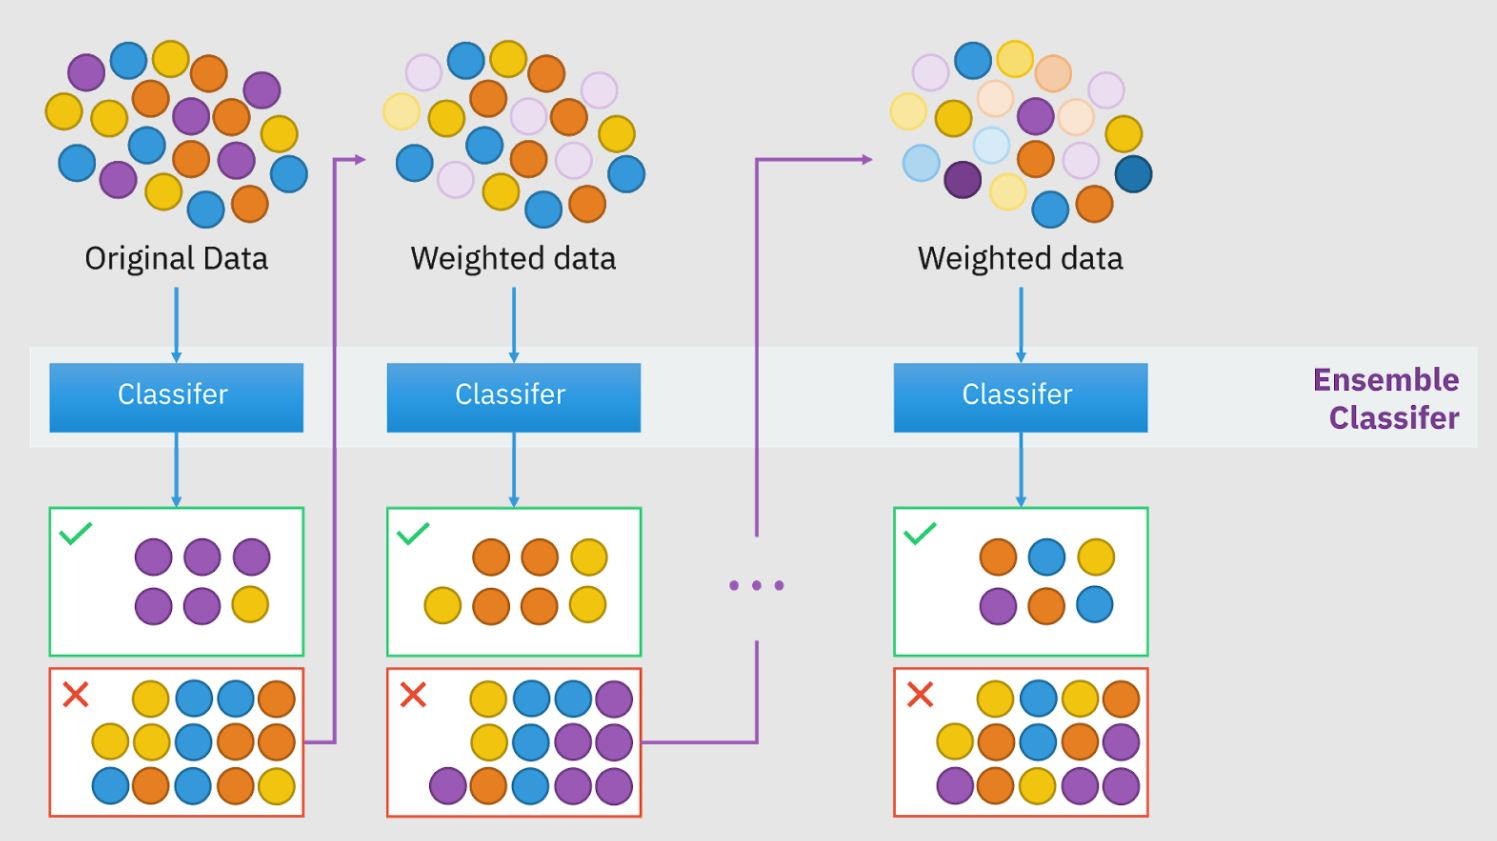

https://arxiv.org/abs/1603.02754

https://xgboost.readthedocs.io/en/stable/index.html

https://pypi.org/project/xgboost/

https://towardsdatascience.com/xgboost-its-genealogy-its-architectural-features-and-its-innovation-bf32b15b45d2

## TASK 6: Train an XGBoost Regression Model

In [62]:
# Train an XGBoost regressor model
import xgboost as xgb
model = xgb.XGBRegressor(learning_rate = 0.2, max_depth = 20, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## TASK 7: Assess Trained XGBoost Model Performance

In [63]:
# predict the score of the trained model using the testing dataset
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.9710754000455706


In [64]:
# make predictions on the test data
y_predict = model.predict(X_test)

In [65]:
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 0.025 
MSE = 0.00061896845 
MAE = 0.0076810825 
R2 = 0.9710754000455706 
Adjusted R2 = 0.9700208573388986
